<img src="https://certificate.tpq.io/taim_logo.png" width="350px" align="right">

# Artificial Intelligence in Finance

## Dense Neural Networks

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [2]:
import os
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('display.precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [4]:
os.environ?

## The Data

In [3]:
url = 'http://hilpisch.com/aiif_eikon_id_eur_usd.csv'

In [4]:
symbol = 'EUR_USD'

In [5]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)

In [8]:
raw.head()

,HIGH,LOW,OPEN,CLOSE
Date,,,,
2019-10-01 00:00:00,1.0899,1.0897,1.0897,1.0899
2019-10-01 00:01:00,1.0899,1.0896,1.0899,1.0898
2019-10-01 00:02:00,1.0898,1.0896,1.0898,1.0896
2019-10-01 00:03:00,1.0898,1.0896,1.0897,1.0898
2019-10-01 00:04:00,1.0898,1.0896,1.0897,1.0898


In [10]:
raw.tail()

,HIGH,LOW,OPEN,CLOSE
Date,,,,
2019-12-31 22:11:00,1.1212,1.1211,1.1212,1.1211
2019-12-31 23:01:00,1.1212,1.1211,1.1211,1.1211
2019-12-31 23:03:00,1.1212,1.1211,1.1212,1.1211
2019-12-31 23:05:00,1.1212,1.1212,1.1212,1.1212
2019-12-31 23:06:00,1.1211,1.1211,1.1211,1.1211


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96526 entries, 2019-10-01 00:00:00 to 2019-12-31 23:06:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    96526 non-null  float64
 1   LOW     96526 non-null  float64
 2   OPEN    96526 non-null  float64
 3   CLOSE   96526 non-null  float64
dtypes: float64(4)
memory usage: 3.7 MB


In [11]:
raw.loc['2019-10-04 21:00:00':'2019-10-06 22:00:00']

,HIGH,LOW,OPEN,CLOSE
Date,,,,
2019-10-04 21:00:00,1.0979,1.0976,1.0978,1.0976
2019-10-04 21:01:00,1.0976,1.0976,1.0976,1.0976
2019-10-06 17:51:00,1.0975,1.0975,1.0975,1.0975
2019-10-06 17:58:00,1.0977,1.0977,1.0977,1.0977
2019-10-06 18:01:00,1.0974,1.0974,1.0974,1.0974
...,...,...,...,...
2019-10-06 21:56:00,1.0978,1.0977,1.0978,1.0978
2019-10-06 21:57:00,1.0978,1.0977,1.0977,1.0978
2019-10-06 21:58:00,1.0978,1.0977,1.0977,1.0978


In [7]:
data = pd.DataFrame(raw['CLOSE'].loc[:])
data.columns = [symbol]

In [13]:
list(data.loc['2019-10-01 00:00:00':'2019-10-01 02:00:00'].resample('1h'))

[(Timestamp('2019-10-01 00:00:00'),
                       EUR_USD
  Date                        
  2019-10-01 00:00:00   1.0899
  2019-10-01 00:01:00   1.0898
  2019-10-01 00:02:00   1.0896
  2019-10-01 00:03:00   1.0898
  2019-10-01 00:04:00   1.0898
  2019-10-01 00:05:00   1.0898
  2019-10-01 00:06:00   1.0899
  2019-10-01 00:07:00   1.0899
  2019-10-01 00:08:00   1.0899
  2019-10-01 00:09:00   1.0899
  2019-10-01 00:10:00   1.0899
  2019-10-01 00:11:00   1.0897
  2019-10-01 00:12:00   1.0899
  2019-10-01 00:13:00   1.0899
  2019-10-01 00:14:00   1.0899
  2019-10-01 00:15:00   1.0899
  2019-10-01 00:16:00   1.0899
  2019-10-01 00:17:00   1.0899
  2019-10-01 00:18:00   1.0899
  2019-10-01 00:19:00   1.0899
  2019-10-01 00:20:00   1.0900
  2019-10-01 00:21:00   1.0899
  2019-10-01 00:22:00   1.0900
  2019-10-01 00:23:00   1.0899
  2019-10-01 00:24:00   1.0898
  2019-10-01 00:25:00   1.0898
  2019-10-01 00:26:00   1.0898
  2019-10-01 00:27:00   1.0899
  2019-10-01 00:28:00   1.0899
  2

In [10]:
data = data.resample('1h', label='right').last()
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1654 entries, 2019-10-01 02:00:00 to 2020-01-01 01:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  1654 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [17]:
data.head()

,EUR_USD
Date,
2019-10-01 01:00:00,1.0896
2019-10-01 02:00:00,1.0890
2019-10-01 03:00:00,1.0886
2019-10-01 04:00:00,1.0888
2019-10-01 05:00:00,1.0889


In [12]:
data.loc['2019-10-04 21:00:00':'2019-10-06 18:00:00']

,EUR_USD
Date,
2019-10-04 21:00:00,1.0979
2019-10-04 22:00:00,1.0977
2019-10-04 23:00:00,1.0976


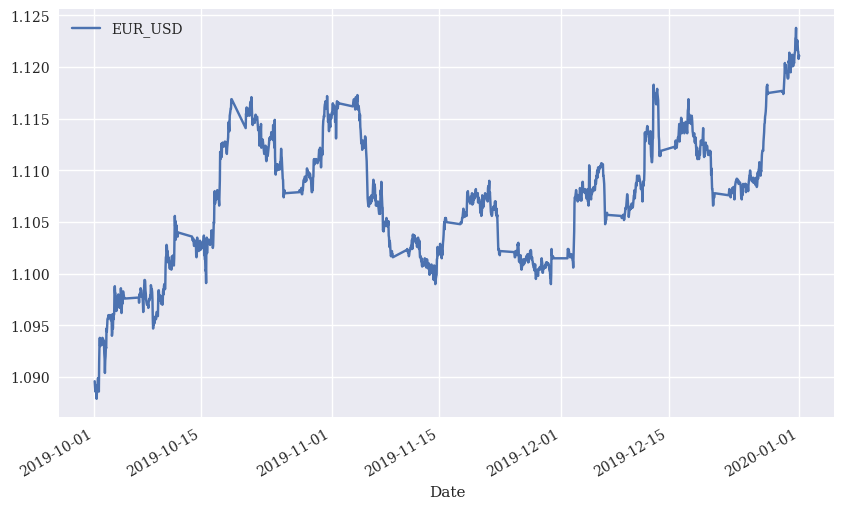

In [13]:
data.plot(figsize=(10, 6));

## Baseline Prediction

In [14]:
lags = 5

In [15]:
def add_lags(data, symbol, lags, window=20):
    cols = []
    df = data.copy()
    df.dropna(inplace=True)
    df['r'] = np.log(df / df.shift())
    df['sma'] = df[symbol].rolling(window).mean()
    df['min'] = df[symbol].rolling(window).min()
    df['max'] = df[symbol].rolling(window).max()
    df['mom'] = df['r'].rolling(window).mean()
    df['vol'] = df['r'].rolling(window).std()
    df.dropna(inplace=True)
    df['d'] = np.where(df['r'] > 0, 1, 0)
    features = [symbol, 'r', 'd', 'sma', 'min', 'max', 'mom', 'vol']
    for f in features:
        for lag in range(1, lags + 1):
            col = f'{f}_lag_{lag}'
            df[col] = df[f].shift(lag)
            cols.append(col)
    df.dropna(inplace=True)
    return df, cols

In [16]:
data, cols = add_lags(data, symbol, lags)

In [17]:
data

,EUR_USD,r,sma,min,max,mom,vol,d,EUR_USD_lag_1,EUR_USD_lag_2,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-02 03:00:00,1.0937,-9.1429e-05,1.0916,1.0879,1.0938,2.2911e-04,0.0008,0,1.0938,1.0932,...,2.2449e-04,2.0165e-04,2.0626e-04,1.8789e-04,1.6035e-04,0.0008,0.0008,0.0008,0.0008,0.0008
2019-10-02 04:00:00,1.0937,0.0000e+00,1.0918,1.0885,1.0938,2.6586e-04,0.0008,0,1.0937,1.0938,...,2.2911e-04,2.2449e-04,2.0165e-04,2.0626e-04,1.8789e-04,0.0008,0.0008,0.0008,0.0008,0.0008
2019-10-02 05:00:00,1.0936,-9.1437e-05,1.0921,1.0886,1.0938,2.3372e-04,0.0008,0,1.0937,1.0937,...,2.6586e-04,2.2911e-04,2.2449e-04,2.0165e-04,2.0626e-04,0.0008,0.0008,0.0008,0.0008,0.0008
2019-10-02 06:00:00,1.0933,-2.7436e-04,1.0923,1.0886,1.0938,1.8786e-04,0.0008,0,1.0936,1.0937,...,2.3372e-04,2.6586e-04,2.2911e-04,2.2449e-04,2.0165e-04,0.0008,0.0008,0.0008,0.0008,0.0008
2019-10-02 07:00:00,1.0935,1.8292e-04,1.0925,1.0886,1.0938,1.9700e-04,0.0008,1,1.0933,1.0936,...,1.8786e-04,2.3372e-04,2.6586e-04,2.2911e-04,2.2449e-04,0.0008,0.0008,0.0008,0.0008,0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:00:00,1.1216,-5.3481e-04,1.1216,1.1201,1.1238,4.9061e-05,0.0006,0,1.1222,1.1226,...,9.8118e-05,1.0255e-04,1.2935e-04,1.0258e-04,7.1371e-05,0.0006,0.0006,0.0006,0.0007,0.0007
2019-12-31 22:00:00,1.1215,-8.9162e-05,1.1216,1.1201,1.1238,3.5679e-05,0.0006,0,1.1216,1.1222,...,4.9061e-05,9.8118e-05,1.0255e-04,1.2935e-04,1.0258e-04,0.0006,0.0006,0.0006,0.0006,0.0007
2019-12-31 23:00:00,1.1208,-6.2436e-04,1.1216,1.1201,1.1238,-1.7841e-05,0.0007,0,1.1215,1.1216,...,3.5679e-05,4.9061e-05,9.8118e-05,1.0255e-04,1.2935e-04,0.0006,0.0006,0.0006,0.0006,0.0006


In [18]:
len(data)

1629

In [30]:
cols

['EUR_USD_lag_1',
 'EUR_USD_lag_2',
 'EUR_USD_lag_3',
 'EUR_USD_lag_4',
 'EUR_USD_lag_5',
 'r_lag_1',
 'r_lag_2',
 'r_lag_3',
 'r_lag_4',
 'r_lag_5',
 'd_lag_1',
 'd_lag_2',
 'd_lag_3',
 'd_lag_4',
 'd_lag_5',
 'sma_lag_1',
 'sma_lag_2',
 'sma_lag_3',
 'sma_lag_4',
 'sma_lag_5',
 'min_lag_1',
 'min_lag_2',
 'min_lag_3',
 'min_lag_4',
 'min_lag_5',
 'max_lag_1',
 'max_lag_2',
 'max_lag_3',
 'max_lag_4',
 'max_lag_5',
 'mom_lag_1',
 'mom_lag_2',
 'mom_lag_3',
 'mom_lag_4',
 'mom_lag_5',
 'vol_lag_1',
 'vol_lag_2',
 'vol_lag_3',
 'vol_lag_4',
 'vol_lag_5']

In [15]:
# data.iloc[:10, :14].round(4)

In [19]:
c = data['d'].value_counts()
c

d
0    891
1    738
Name: count, dtype: int64

In [20]:
def cw(df):
    c0, c1 = np.bincount(df['d'])
    w0 = (1 / c0) * (len(df)) / 2
    w1 = (1 / c1) * (len(df)) / 2
    return {0: w0, 1: w1}

In [21]:
class_weight = cw(data)

In [22]:
class_weight

{0: 0.9141414141414143, 1: 1.103658536585366}

In [23]:
class_weight[0] * c[0]

814.5000000000001

In [24]:
class_weight[1] * c[1]

814.5000000000001

In [22]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'

In [25]:
import random
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import accuracy_score

In [26]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [27]:
from keras.src.optimizers import Adam

# optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001)
optimizer = Adam(learning_rate=0.001)

In [28]:
def create_model(hl=1, hu=128, optimizer=optimizer):
    model = Sequential()
    model.add(Dense(hu, input_dim=len(cols),
                    activation='relu'))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [29]:
set_seeds()
model = create_model(hl=1, hu=128)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,889 (85.50 KB)

 Trainable params: 21,889 (85.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
%%time
model.fit(data[cols], data['d'], epochs=50,
          verbose=False, class_weight=cw(data))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)
2024-09-22 16:39:14.369686: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


CPU times: user 2.3 s, sys: 365 ms, total: 2.66 s
Wall time: 2.12 s


In [31]:
model.evaluate(data[cols], data['d'])

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5758 - loss: 0.6809


[0.6838529706001282, 0.5567833185195923]

In [32]:
data['p'] = np.where(model.predict(data[cols]) > 0.5, 1, 0)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


In [33]:
data['p'].value_counts()

p
0    957
1    672
Name: count, dtype: int64

In [34]:
split = int(len(data) * 0.8)
split

1303

In [35]:
train = data.iloc[:split].copy()

In [36]:
test = data.iloc[split:].copy()

In [37]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=1, hu=128,optimizer=optimizer)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
%%time 
hist = model.fit(train[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 2.57 s, sys: 384 ms, total: 2.95 s
Wall time: 2.48 s


In [39]:
model.evaluate(train[cols], train['d'])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.5632 - loss: 0.6810


[0.6847175359725952, 0.5495011806488037]

In [40]:
model.evaluate(test[cols], test['d'])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.4884 - loss: 0.7102


[0.7036775350570679, 0.512269914150238]

In [41]:
test['p'] = np.where(model.predict(test[cols]) > 0.5, 1, 0)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [42]:
test['p'].value_counts()

p
1    164
0    162
Name: count, dtype: int64

In [43]:
res = pd.DataFrame(hist.history)

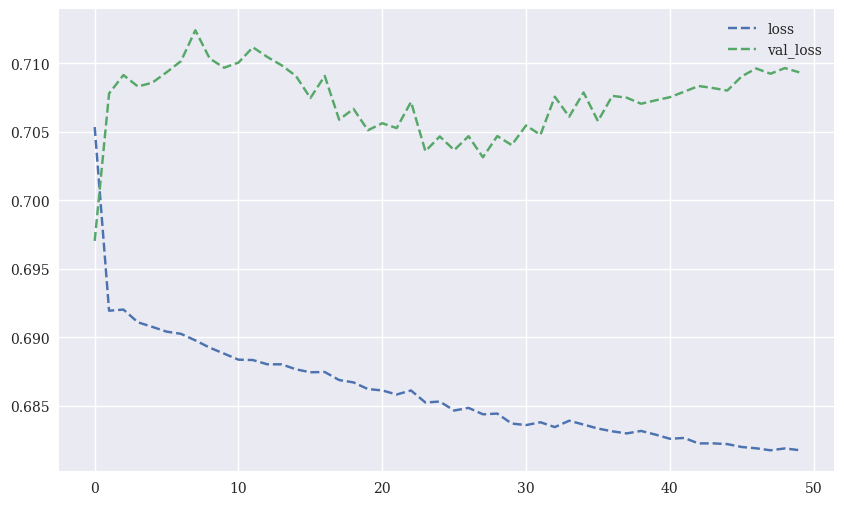

In [44]:
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

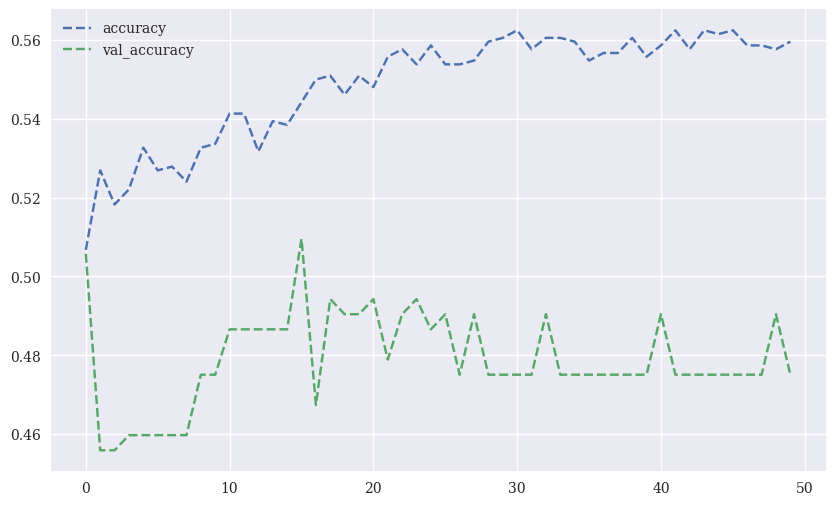

In [45]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

## Normalization

In [46]:
mu, std = train.mean(), train.std()

In [47]:
train_ = (train - mu) / std

In [48]:
train_.std().round(3)

EUR_USD          1.0
r                1.0
sma              1.0
min              1.0
max              1.0
mom              1.0
vol              1.0
d                1.0
EUR_USD_lag_1    1.0
EUR_USD_lag_2    1.0
EUR_USD_lag_3    1.0
EUR_USD_lag_4    1.0
EUR_USD_lag_5    1.0
r_lag_1          1.0
r_lag_2          1.0
r_lag_3          1.0
r_lag_4          1.0
r_lag_5          1.0
d_lag_1          1.0
d_lag_2          1.0
d_lag_3          1.0
d_lag_4          1.0
d_lag_5          1.0
sma_lag_1        1.0
sma_lag_2        1.0
sma_lag_3        1.0
sma_lag_4        1.0
sma_lag_5        1.0
min_lag_1        1.0
min_lag_2        1.0
min_lag_3        1.0
min_lag_4        1.0
min_lag_5        1.0
max_lag_1        1.0
max_lag_2        1.0
max_lag_3        1.0
max_lag_4        1.0
max_lag_5        1.0
mom_lag_1        1.0
mom_lag_2        1.0
mom_lag_3        1.0
mom_lag_4        1.0
mom_lag_5        1.0
vol_lag_1        1.0
vol_lag_2        1.0
vol_lag_3        1.0
vol_lag_4        1.0
vol_lag_5    

In [55]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=2, hu=128, optimizer=optimizer)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
%%time 
hist = model.fit(train_[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 2.8 s, sys: 396 ms, total: 3.19 s
Wall time: 2.66 s


In [65]:
model.evaluate(train_[cols], train['d'])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.8595 - loss: 0.3261


[0.47142598032951355, 0.8142747282981873]

In [66]:
test_ = (test - mu) / std

In [67]:
model.evaluate(test_[cols], test['d'])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5333 - loss: 1.2546


[1.1239142417907715, 0.5306748747825623]

In [60]:
test['p'] = np.where(model.predict(test_[cols]) > 0.5, 1, 0)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [61]:
test['p'].value_counts()

p
1    230
0     96
Name: count, dtype: int64

In [62]:
res = pd.DataFrame(hist.history)

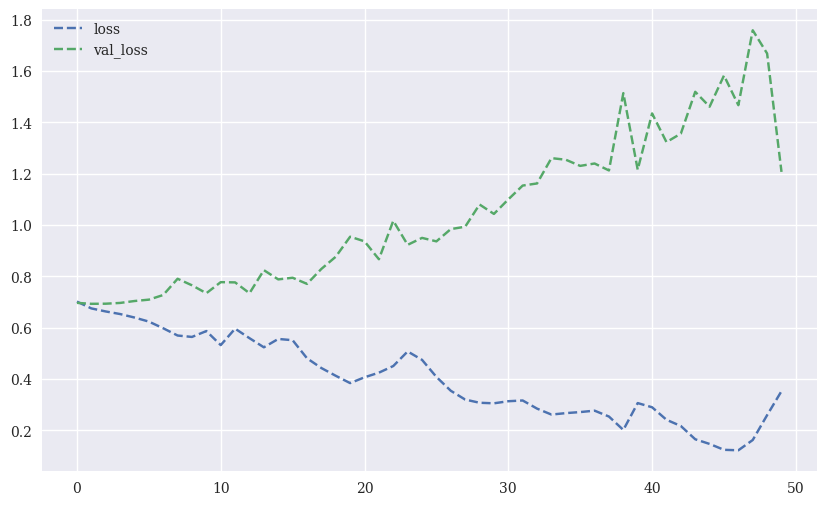

In [64]:
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

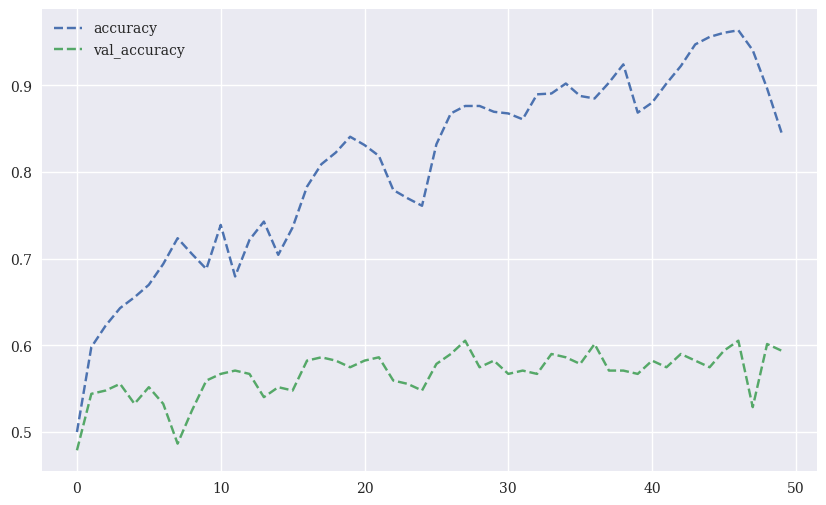

In [63]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

## Dropout 

Dropout: 随机丢弃一部分神经元，下面例子中随机丢掉30%

In [68]:
from keras.layers import Dropout

In [69]:
def create_model(hl=1, hu=128, dropout=True, rate=0.3,
                 optimizer=optimizer):
    model = Sequential()
    model.add(Dense(hu, input_dim=len(cols),
                    activation='relu'))
    if dropout:
        model.add(Dropout(rate, seed=100))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu'))
        if dropout:
            model.add(Dropout(rate, seed=100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
                 metrics=['accuracy'])
    return model

In [70]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=1, hu=128, rate=0.3, optimizer=optimizer)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,669 (256.52 KB)

 Trainable params: 21,889 (85.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 43,780 (171.02 KB)

In [74]:
%%time 
hist = model.fit(train_[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.15, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 2.2 s, sys: 289 ms, total: 2.49 s
Wall time: 2.05 s


In [75]:
model.evaluate(train_[cols], train['d'])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8730 - loss: 0.3544


[0.4423079490661621, 0.8135073184967041]

In [76]:
model.evaluate(test_[cols], test['d'])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.4962 - loss: 1.0887


[0.9939177632331848, 0.5214723944664001]

In [61]:
res = pd.DataFrame(hist.history)

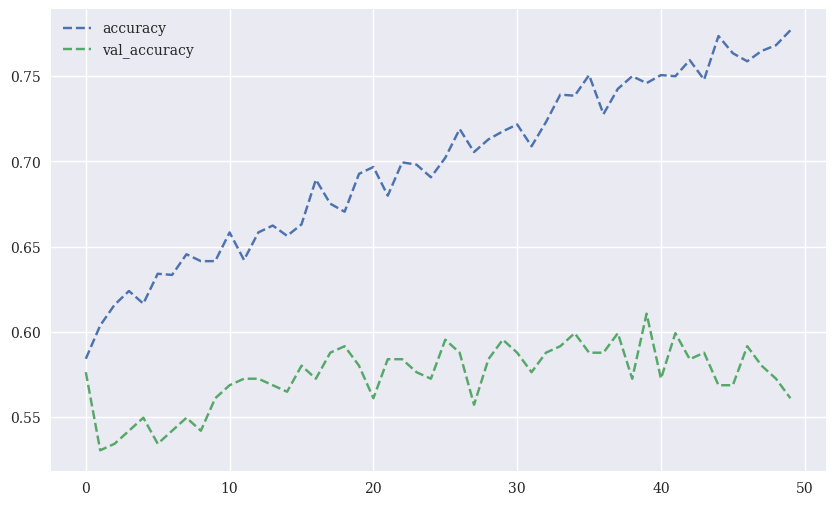

In [62]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

## Regularization 

In [77]:
from keras.regularizers import l1, l2

In [100]:
def create_model(hl=1, hu=128, dropout=False, rate=0.3, 
                 regularize=False, reg=l1(0.0005),
                 optimizer=optimizer, input_dim=len(cols)):
    optimizer = Adam(learning_rate=0.001)
    if not regularize:
        reg = None
    model = Sequential()
    model.add(Dense(hu, input_dim=input_dim,
                    activity_regularizer=reg,
                    activation='relu'))
    if dropout:
        model.add(Dropout(rate, seed=100))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu',
                        activity_regularizer=reg))
        if dropout:
            model.add(Dropout(rate, seed=100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
                 metrics=['accuracy'])
    return model

In [79]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=1, hu=128, regularize=True,optimizer=optimizer)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
%%time 
hist = model.fit(train_[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 2.6 s, sys: 382 ms, total: 2.98 s
Wall time: 2.46 s


In [81]:
model.evaluate(train_[cols], train['d'])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.7194 - loss: 0.6031


[0.6371609568595886, 0.6792018413543701]

In [82]:
model.evaluate(test_[cols], test['d'])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5192 - loss: 0.8764


[0.8428676128387451, 0.5153374075889587]

In [83]:
res = pd.DataFrame(hist.history)

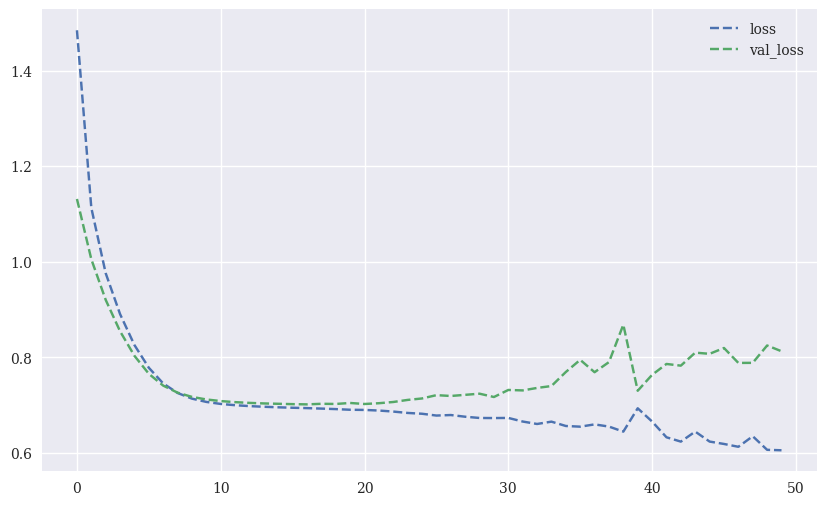

In [85]:
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

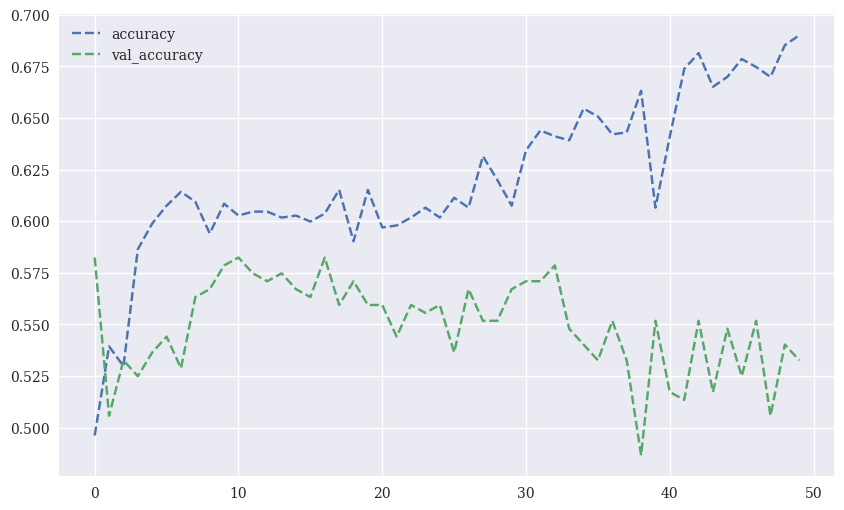

In [84]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

In [86]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=2, hu=128,
                     dropout=True, rate=0.3,
                     regularize=True, reg=l2(0.001),
                    optimizer=optimizer)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
%%time 
hist = model.fit(train_[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 3.06 s, sys: 398 ms, total: 3.46 s
Wall time: 2.94 s


In [88]:
model.evaluate(train_[cols], train['d'])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.6726 - loss: 0.6410


[0.6515108942985535, 0.6515733003616333]

In [89]:
model.evaluate(test_[cols], test['d'])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5079 - loss: 0.8750


[0.8446894884109497, 0.5306748747825623]

In [90]:
res = pd.DataFrame(hist.history)

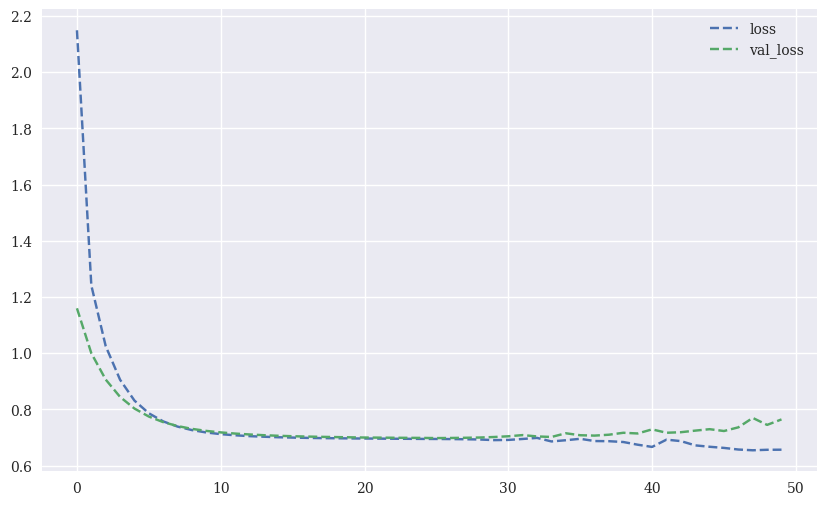

In [93]:
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

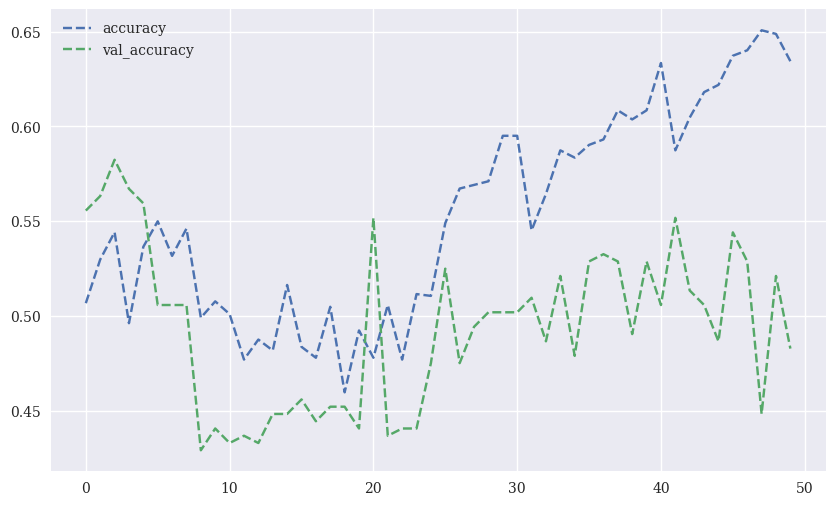

In [91]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

In [94]:
res.mean()['accuracy'] - res.mean()['val_accuracy']

0.0584336811304092

## Bagging

In [95]:
from sklearn.ensemble import BaggingClassifier
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [79]:
len(cols)

40

In [96]:
max_features = 0.75

In [101]:
set_seeds()
base_estimator = KerasClassifier(model=create_model,
                        verbose=False, epochs=20, hl=1, hu=128,
                        dropout=True, regularize=False,
                        input_dim=int(len(cols) * max_features))

In [102]:
model_bag = BaggingClassifier(estimator=base_estimator,
                          n_estimators=15,
                          max_samples=0.75,
                          max_features=max_features,
                          bootstrap=True,
                          bootstrap_features=True,
                          n_jobs=1,
                          random_state=100,
                         )

In [103]:
%time model_bag.fit(train_[cols], train['d'])

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

CPU times: user 13.6 s, sys: 1.5 s, total: 15.1 s
Wall time: 12.9 s


BaggingClassifier(bootstrap_features=True,
                  estimator=KerasClassifier(dropout=True, epochs=20, hl=1, hu=128, input_dim=30, model=<function create_model at 0x1582ea4d0>, regularize=False, verbose=False),
                  max_features=0.75, max_samples=0.75, n_estimators=15,
                  n_jobs=1, random_state=100)

In [104]:
model_bag.score(train_[cols], train['d'])

0.6231772831926324

In [105]:
model_bag.score(test_[cols], test['d'])

0.5368098159509203

In [106]:
test['p'] = model_bag.predict(test_[cols])

In [107]:
test['p'].value_counts()

p
0    310
1     16
Name: count, dtype: int64

## Optimizers

In [108]:
import time

In [111]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adadelta',
              'adam', 'adamax', 'nadam']

In [112]:
def create_model(hl=1, hu=128, dropout=False, rate=0.3, 
                 regularize=False, reg=l1(0.0005),
                 optimizer=optimizer, input_dim=len(cols)):
    if not regularize:
        reg = None
    model = Sequential()
    model.add(Dense(hu, input_dim=input_dim,
                    activity_regularizer=reg,
                    activation='relu'))
    if dropout:
        model.add(Dropout(rate, seed=100))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu',
                        activity_regularizer=reg))
        if dropout:
            model.add(Dropout(rate, seed=100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
                 metrics=['accuracy'])
    return model

In [113]:
%%time
for optimizer in optimizers:
    set_seeds()
    model = create_model(hl=1, hu=128,
                     dropout=True, rate=0.3,
                     regularize=False, reg=l2(0.001),
                     optimizer=optimizer
                    )
    t0 = time.time()
    model.fit(train_[cols], train['d'],
              epochs=50, verbose=False,
              validation_split=0.2, shuffle=False,
              class_weight=cw(train))
    t1 = time.time()
    t = t1 - t0
    acc_tr = model.evaluate(train_[cols], train['d'], verbose=False)[1]
    acc_te = model.evaluate(test_[cols], test['d'], verbose=False)[1]
    out = f'{optimizer:10s} | time[s]: {t:.4f} | in-sample={acc_tr:.4f}'
    out += f' | out-of-sample={acc_te:.4f}'
    print(out)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


sgd        | time[s]: 2.2906 | in-sample=0.5994 | out-of-sample=0.5245


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


rmsprop    | time[s]: 2.3053 | in-sample=0.7322 | out-of-sample=0.5123


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adagrad    | time[s]: 2.2173 | in-sample=0.5687 | out-of-sample=0.5123


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adadelta   | time[s]: 2.4850 | in-sample=0.4467 | out-of-sample=0.4877


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adam       | time[s]: 2.3712 | in-sample=0.7460 | out-of-sample=0.5031


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adamax     | time[s]: 2.3359 | in-sample=0.6523 | out-of-sample=0.5061


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


nadam      | time[s]: 2.6739 | in-sample=0.7437 | out-of-sample=0.4939
CPU times: user 18.4 s, sys: 2.56 s, total: 21 s
Wall time: 17.3 s


In [114]:
test['p'] = np.where(model.predict(test_[cols]) > 0.5, 1, 0)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [115]:
test['p'].value_counts()

p
0    240
1     86
Name: count, dtype: int64

In [93]:
accuracy_score(test['p'], test['d'])

0.665903890160183

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>